In [648]:
from pprint import pprint
from backend.connect_to_api import ResRobot

# Skapar en instans av ResRobot
resrobot = ResRobot()

In [649]:
# Hämta departureBoard-data
departure_data = resrobot.timetable_departure(location_id=740000002)

In [650]:
import pandas as pd
# Extrahera relevant data för avgångar
departures = []
for dep in departure_data["Departure"]:
    product = dep["Product"][0]
    departures.append(
        {
            "TransportName": product["name"],
            "Line": product["line"],
            "Operator": product["operator"],
            "StopID": dep["stopid"],
            "Time": dep["time"],
        }
    )

df_departures = pd.DataFrame(departures)
print(df_departures)


               TransportName   Line    Operator  \
0       Länstrafik - Buss X4     X4  Västtrafik   
1      Länstrafik - Buss SNU    SNU  Västtrafik   
2       Länstrafik - Buss X1     X1  Västtrafik   
3       Länstrafik - Buss 17     17  Västtrafik   
4      Länstrafik - Buss 510    510  Västtrafik   
..                       ...    ...         ...   
243   Länstrafik - Buss TEXP   TEXP  Västtrafik   
244  Länstrafik - Buss SVART  SVART  Västtrafik   
245    Länstrafik - Buss SNU    SNU  Västtrafik   
246     Länstrafik - Buss X1     X1  Västtrafik   
247   Länstrafik - Spårväg 6      6  Västtrafik   

                                                StopID      Time  
0    A=1@O=Göteborg Polhemsplatsen@X=11977317@Y=577...  15:56:00  
1    A=1@O=Göteborg Nils Ericsonterminal@X=11971852...  15:56:00  
2    A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...  15:56:00  
3    A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...  15:57:00  
4    A=1@O=Göteborg Polhemsplatsen@X=11977317@Y=577.

In [651]:
# Hämta arrivalBoard-data
arrival_data = resrobot.timetable_arrival(location_id=740000002)

In [652]:
# Utforska första Arrival-objektet
pprint(arrival_data["Arrival"][0])

{'JourneyDetailRef': {'ref': '1|304|0|1|21012025'},
 'JourneyStatus': 'P',
 'Notes': {'Note': [{'key': 'EG',
                     'routeIdxFrom': 0,
                     'routeIdxTo': 9,
                     'txtN': 'Lag 2015:953 tillämpas',
                     'type': 'A',
                     'value': 'Lag 2015:953 tillämpas'}]},
 'Product': [{'admin': '279___',
              'catCode': '7',
              'catIn': 'BLT',
              'catOut': 'BLT',
              'catOutL': 'Länstrafik - Buss',
              'catOutS': 'BLT',
              'cls': '128',
              'displayNumber': 'X4',
              'icon': {'res': 'prod_gen'},
              'internalName': 'Länstrafik - Buss X4',
              'line': 'X4',
              'lineId': '1279520500001',
              'matchId': 'X4;5205;211',
              'name': 'Länstrafik - Buss X4',
              'num': 'X4',
              'operator': 'Västtrafik',
              'operatorCode': '279',
              'operatorInfo': {'id': '279'

In [653]:
# tar utdata för ankomster
arrivals = []

for arr in arrival_data["Arrival"]:
    product = arr["Product"][0]
    arrivals.append(
        {
            "TransportName": product["name"],
            "Line": product["line"],
            "Operator": product["operator"],
            "StopID": arr["stopid"],
            "Time": arr["time"],
        }
    )

In [654]:
# Skapa en DataFrame för ankomster
df_arrivals = pd.DataFrame(arrivals)


In [655]:
print(df_arrivals)

               TransportName   Line    Operator  \
0       Länstrafik - Buss X4     X4  Västtrafik   
1       Länstrafik - Buss X1     X1  Västtrafik   
2       Länstrafik - Buss 59     59  Västtrafik   
3       Länstrafik - Buss 17     17  Västtrafik   
4      Länstrafik - Buss 510    510  Västtrafik   
..                       ...    ...         ...   
235     Länstrafik - Buss X1     X1  Västtrafik   
236    Länstrafik - Tåg 3663   3663  Västtrafik   
237  Länstrafik - Buss SVART  SVART  Västtrafik   
238     Länstrafik - Buss X1     X1  Västtrafik   
239   Länstrafik - Spårväg 6      6  Västtrafik   

                                                StopID      Time  
0    A=1@O=Göteborg Polhemsplatsen@X=11977317@Y=577...  15:56:00  
1    A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...  15:56:00  
2    A=1@O=Göteborg Nils Ericsonterminal@X=11971852...  15:57:00  
3    A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...  15:57:00  
4    A=1@O=Göteborg Polhemsplatsen@X=11977317@Y=577.

In [656]:
# Hämta Trip-data med passlist för mellanliggande stopp
trip_data = resrobot.trips(origin_id=740000002, destination_id=740000001)

# Utforska första resan
pprint(trip_data["Trip"][0])


{'Destination': {'date': '2025-01-21',
                 'extId': '740000001',
                 'id': 'A=1@O=Stockholm '
                       'Centralstation@X=18058151@Y=59330136@U=1@L=740000001@',
                 'lat': 59.330136,
                 'lon': 18.058151,
                 'minimumChangeDuration': 'PT20M',
                 'name': 'Stockholm Centralstation',
                 'prognosisType': 'PROGNOSED',
                 'routeIdx': 18,
                 'time': '20:44:00',
                 'type': 'ST'},
 'LegList': {'Leg': [{'Destination': {'date': '2025-01-21',
                                      'extId': '740000001',
                                      'id': 'A=1@O=Stockholm '
                                            'Centralstation@X=18058151@Y=59330136@U=1@L=740000001@',
                                      'lat': 59.330136,
                                      'lon': 18.058151,
                                      'minimumChangeDuration': 'PT20M',
         

In [657]:
# departureboard för en station

station_id = 740000002

departure_json = resrobot.timetable_departure(location_id=station_id)

pprint(departure_json)


{'Departure': [{'JourneyDetailRef': {'ref': '1|304|0|1|21012025'},
                'JourneyStatus': 'P',
                'Notes': {'Note': [{'key': 'EG',
                                    'routeIdxFrom': 9,
                                    'routeIdxTo': 27,
                                    'txtN': 'Lag 2015:953 tillämpas',
                                    'type': 'A',
                                    'value': 'Lag 2015:953 tillämpas'}]},
                'Product': [{'admin': '279___',
                             'catCode': '7',
                             'catIn': 'BLT',
                             'catOut': 'BLT',
                             'catOutL': 'Länstrafik - Buss',
                             'catOutS': 'BLT',
                             'cls': '128',
                             'displayNumber': 'X4',
                             'icon': {'res': 'prod_gen'},
                             'internalName': 'Länstrafik - Buss X4',
                             '

In [658]:


df_dep = pd.DataFrame(departure_json.get("Departure", []))

print(df_dep.columns.tolist())
df_dep.head(10)


['JourneyDetailRef', 'JourneyStatus', 'ProductAtStop', 'Product', 'Notes', 'name', 'type', 'stop', 'stopid', 'stopExtId', 'lon', 'lat', 'time', 'date', 'reachable', 'direction', 'directionFlag', 'rtPlatform', 'prognosisType', 'rtTime', 'rtDate', 'rtTrack']


,JourneyDetailRef,JourneyStatus,ProductAtStop,Product,Notes,name,type,stop,stopid,stopExtId,...,time,date,reachable,direction,directionFlag,rtPlatform,prognosisType,rtTime,rtDate,rtTrack
0,{'ref': '1|304|0|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss X4,ST,Göteborg Polhemsplatsen,A=1@O=Göteborg Polhemsplatsen@X=11977317@Y=577...,740059478,...,15:56:00,2025-01-21,True,Höga hallar (Härryda kn),1,NaN,NaN,NaN,NaN,NaN
1,{'ref': '1|32155|8|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss SNU,ST,Göteborg Nils Ericsonterminal,A=1@O=Göteborg Nils Ericsonterminal@X=11971852...,740020483,...,15:56:00,2025-01-21,True,Stenungsund station,2,NaN,NaN,NaN,NaN,NaN
2,{'ref': '1|100041|4|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss X1,ST,Göteborg Nordstan,A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...,740015585,...,15:56:00,2025-01-21,True,Partille centrum,2,NaN,NaN,NaN,NaN,NaN
3,{'ref': '1|68166|3|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss 17,ST,Göteborg Nordstan,A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...,740015585,...,15:57:00,2025-01-21,True,Göteborg Östra sjukhuset,1,NaN,NaN,NaN,NaN,NaN
4,{'ref': '1|135652|3|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss 510,ST,Göteborg Polhemsplatsen,A=1@O=Göteborg Polhemsplatsen@X=11977317@Y=577...,740059478,...,15:57:00,2025-01-21,True,Partille centrum,2,NaN,NaN,NaN,NaN,NaN
5,{'ref': '1|541|1|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss X4,ST,Göteborg Polhemsplatsen,A=1@O=Göteborg Polhemsplatsen@X=11977317@Y=577...,740059478,...,15:58:00,2025-01-21,True,Kungälv resecentrum,2,NaN,NaN,NaN,NaN,NaN
6,{'ref': '1|68251|3|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss 17,ST,Göteborg Nordstan,A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...,740015585,...,15:58:00,2025-01-21,True,Hinnebäcksgatan (Göteborg kn),2,NaN,NaN,NaN,NaN,NaN
7,{'ref': '1|135579|1|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss 510,ST,Göteborg Polhemsplatsen,A=1@O=Göteborg Polhemsplatsen@X=11977317@Y=577...,740059478,...,15:58:00,2025-01-21,True,Göteborg Heden,1,NaN,NaN,NaN,NaN,NaN
8,{'ref': '1|383|0|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss X4,ST,Göteborg Nordstan,A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...,740015585,...,15:59:00,2025-01-21,True,Mölnlycke station (Härryda kn),1,NaN,NaN,NaN,NaN,NaN
9,{'ref': '1|541|1|1|21012025'},P,"{'icon': {'res': 'prod_gen'}, 'operatorInfo': ...","[{'icon': {'res': 'prod_gen'}, 'operatorInfo':...","{'Note': [{'value': 'Lag 2015:953 tillämpas', ...",Länstrafik - Buss X4,ST,Göteborg Nordstan,A=1@O=Göteborg Nordstan@X=11970791@Y=57709246@...,740015585,...,15:59:00,2025-01-21,True,Kungälv resecentrum,2,NaN,NaN,NaN,NaN,NaN


In [659]:

# Utforskar: rtTime, rtDate, rtTrack, rtDepTrack

realtime_cols = ["rtTime", "rtDate", "rtTrack", "rtDepTrack"]
for c in realtime_cols:
    if c in df_dep.columns:
        print(f"\n=== EDA för kolumn '{c}' ===")
        print(" - Antal icke-NaN:", df_dep[c].notna().sum())
        print(" - Unika värden:", df_dep[c].unique()[:15], "... (visar max 15 unika)")
        print(" - value_counts:", df_dep[c].value_counts(dropna=False).head(10))
    else:
        print(f"\nKolumn '{c}' saknas i df_dep")

# Räknar hur många avgångar som har rtTrack
if "rtTrack" in df_dep.columns:
    num_with_rttrack = df_dep["rtTrack"].notna().sum()
    print(f"\nAntal avgångar med 'rtTrack' ifyllt: {num_with_rttrack}")
else:
    print("\n'rtTrack' saknas.")


=== EDA för kolumn 'rtTime' ===
 - Antal icke-NaN: 27
 - Unika värden: [nan '15:59:00' '16:00:00' '16:03:00' '16:04:00' '16:05:00' '16:06:00'
 '16:10:00' '16:13:00' '16:15:00' '16:18:00' '16:19:00' '16:20:00'
 '16:25:00' '16:30:00'] ... (visar max 15 unika)
 - value_counts: rtTime
NaN         221
16:00:00      2
16:35:00      2
16:15:00      2
16:10:00      2
16:45:00      2
16:40:00      2
16:30:00      2
15:59:00      1
16:04:00      1
Name: count, dtype: int64

=== EDA för kolumn 'rtDate' ===
 - Antal icke-NaN: 27
 - Unika värden: [nan '2025-01-21'] ... (visar max 15 unika)
 - value_counts: rtDate
NaN           221
2025-01-21     27
Name: count, dtype: int64

=== EDA för kolumn 'rtTrack' ===
 - Antal icke-NaN: 27
 - Unika värden: [nan '4' '9' '15' '6' '11' '10' '2' '14' '8' '5' '1' '16' '12' '3'] ... (visar max 15 unika)
 - value_counts: rtTrack
NaN    221
10       4
15       3
4        3
16       3
9        2
14       2
8        2
2        1
11       1
Name: count, dtype: int64

K

In [660]:
# Om 'rtTime' saknas använder vi 'time'.

def get_departure_time(row):
    if pd.notna(row.get("rtTime")) and row["rtTime"]:
        return row["rtTime"]
    else:
        return row["time"]

df_dep["usedTime"] = df_dep.apply(get_departure_time, axis=1)

# Kolla några rader
df_dep[["time","rtTime","usedTime"]].head(10)

,time,rtTime,usedTime
0,15:56:00,NaN,15:56:00
1,15:56:00,NaN,15:56:00
2,15:56:00,NaN,15:56:00
3,15:57:00,NaN,15:57:00
4,15:57:00,NaN,15:57:00
5,15:58:00,NaN,15:58:00
6,15:58:00,NaN,15:58:00
7,15:58:00,NaN,15:58:00
8,15:59:00,NaN,15:59:00
9,15:59:00,NaN,15:59:00


In [661]:
# Räkna hur många rader = hur många avgångar/ankomster
num_departures = len(df_departures)
num_arrivals = len(df_arrivals)

print(f"Number of departures at station {station_id}: {num_departures}")
print(f"Number of arrivals at station {station_id}: {num_arrivals}")


Number of departures at station 740000002: 248
Number of arrivals at station 740000002: 240


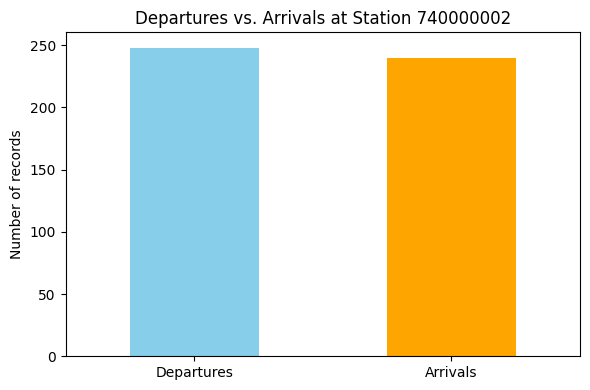

In [662]:
import matplotlib.pyplot as plt

df_counts = pd.DataFrame({
    "Type": ["Departures", "Arrivals"],
    "Count": [num_departures, num_arrivals]
})

# Rita ett stapeldiagram
df_counts.plot(kind="bar", x="Type", y="Count", legend=False, color=["skyblue","orange"], figsize=(6,4))
plt.title(f"Departures vs. Arrivals at Station {station_id}")
plt.xlabel("")
plt.ylabel("Number of records")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



labels = ["Departures", "Arrivals"]
counts = [num_departures, num_arrivals]

# Välj några färger
colors = ["#1f77b4", "#ff7f0e"]  # Ex: blå och orange


<Figure size 600x400 with 0 Axes>

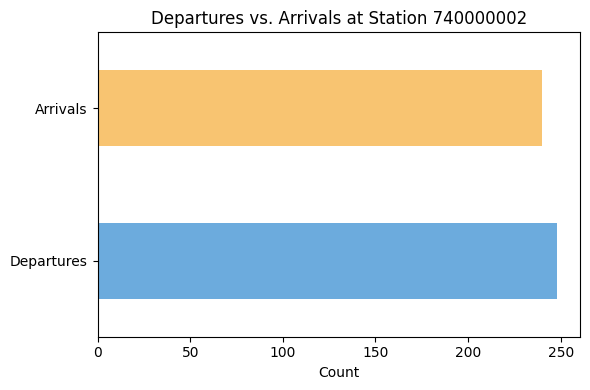

In [663]:

df_counts = pd.DataFrame({
    "Type": ["Departures", "Arrivals"],
    "Count": [num_departures, num_arrivals]
})

plt.figure(figsize=(6,4))
# .plot(kind="barh") → horisontella staplar
df_counts.plot(kind="barh", x="Type", y="Count", legend=False, 
               color=["#6CABDD","#F8C471"], figsize=(6,4))

plt.title(f"Departures vs. Arrivals at Station {station_id}")
plt.xlabel("Count")
plt.ylabel("")
plt.tight_layout()
plt.show()